In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#tell jupyter to render plots in notebook rather than new windows
%matplotlib inline

# if want to time something, do
# %%time 

In [2]:
players = pd.read_csv("PlayerData.csv",encoding = "ISO-8859-1")
players.drop_duplicates()
players.head()

,NCAA_Player,first_name,last_name,jersey_num,height,weight,birth_state,TeamName,avg_points,avg_mins,...,avg_def_rebnd,avg_rebnd,avg_assists,avg_turnovers,avg_steals,avg_blocks,avg_ATR,avg_personal_fouls,avg_tech_fouls,avg_flagrant_fouls
0,Matt Conway,Matt,Conway,33.0,79.0,210.0,AZ,Albany,2.250000,8.333333,...,0.583333,1.083333,0.250000,0.333333,0.041667,0.208333,0.083333,0.791667,0.0,0.0
1,Skyler Nash,Skyler,Nash,1.0,78.0,215.0,IL,Vermont,1.153846,4.312500,...,0.384615,0.312500,0.214286,0.307692,0.000000,0.000000,0.062500,0.230769,0.0,0.0
2,Bryan Sekunda,Bryan,Sekunda,22.0,78.0,190.0,PA,Stony Brook,5.032520,18.637931,...,1.048780,1.560976,1.056911,0.560976,0.325203,0.154472,0.489106,1.040650,1.0,0.0
3,Jordan Reed,Jordan,Reed,11.0,72.0,190.0,TX,Rice,4.696203,23.819444,...,1.354430,1.725000,1.367089,1.240506,0.443038,0.075949,0.779125,1.493671,0.0,0.0
4,Jakob Stenhede,Jakob,Stenhede,41.0,82.0,205.0,NaN,UMBC,1.214286,6.951220,...,0.975610,1.325581,0.024390,0.219512,0.048780,0.219512,0.000000,0.975610,0.0,0.0


In [3]:
players.shape
#outputs 12841 players by 33 variables

# df methods:
# df.dtypes gives cols and their datatypes
# df['newCol'] = newstuff


(12841, 34)

In [4]:
#%%time 
players['full_name'] = players['first_name'] + ' ' + players['last_name']

In [5]:
players.tail()

,NCAA_Player,first_name,last_name,jersey_num,height,weight,birth_state,TeamName,avg_points,avg_mins,...,avg_rebnd,avg_assists,avg_turnovers,avg_steals,avg_blocks,avg_ATR,avg_personal_fouls,avg_tech_fouls,avg_flagrant_fouls,full_name
12836,Josh Bougher,Josh,Bougher,15.0,76.0,195.0,TN,Tennessee Tech,0.888889,3.666667,...,0.444444,0.111111,0.000000,0.111111,0.000000,0.0,0.222222,0.0,0.0,Josh Bougher
12837,T.J. Johnson,T.J.,Johnson,25.0,74.0,175.0,FL,South Alabama,1.000000,8.333333,...,0.666667,0.666667,0.666667,0.000000,0.000000,0.0,0.666667,0.0,0.0,T.J. Johnson
12838,Garrett Mullis,Garrett,Mullis,40.0,80.0,230.0,SC,Citadel,1.000000,11.000000,...,1.333333,0.000000,0.333333,0.000000,0.333333,0.0,1.000000,0.0,0.0,Garrett Mullis
12839,Andrew Dotson,Andrew,Dotson,2.0,75.0,0.0,TX,New Hampshire,1.000000,4.833333,...,0.100000,0.222222,0.111111,0.111111,0.000000,0.0,0.111111,0.0,0.0,Andrew Dotson
12840,Damion Rashford,Damion,Rashford,2.0,76.0,221.0,Ontario,Loyola (MD),1.000000,11.333333,...,0.333333,0.666667,0.333333,0.333333,0.000000,0.0,0.333333,0.0,0.0,Damion Rashford


In [6]:
NBA = pd.read_csv("NBAonlyNames.csv")
NBA.drop_duplicates()
NBA.tail()

,NBA_Player
4619,Ante Zizic
4620,Jim Zoet
4621,Bill Zopf
4622,Ivica Zubac
4623,Matt Zunic


In [7]:
ncaa_test = pd.DataFrame({'player': ['Joe', 'Mark', 'Bruce'],
                          'height': ['63', '62', '61']})

NBA_test = pd.DataFrame({'playername': ['Ben', 'Mark', 'Max']})

In [38]:
ncaa_test['NBA'] = np.where(ncaa_test.player.isin(NBA_test.playername),1,0)

ncaa_test['height'] = np.where(ncaa_test['height']== '63', 'TESTVALUE', ncaa_test['height'])

In [39]:
ncaa_test

,player,height,NBA
0,Joe,TESTVALUE,0
1,Mark,62,1
2,Bruce,61,0


In [10]:
#LjoinTest = ncaa_test.join(NBA_test, on='player')




LjoinTest = ncaa_test.loc[~ncaa_test.player.isin(NBA_test.playername)]

LjoinTest

,player,height,NBA
0,Joe,63,0
2,Bruce,61,0


In [11]:
NCAA_to_PRO = players.loc[players.full_name.isin(NBA.NBA_Player)]
NCAA_not_PRO = players.loc[~players.full_name.isin(NBA.NBA_Player)]

In [12]:
#all player data for people who ended up going pro
#NCAA_to_PRO

,NCAA_Player,first_name,last_name,jersey_num,height,weight,birth_state,TeamName,avg_points,avg_mins,...,avg_rebnd,avg_assists,avg_turnovers,avg_steals,avg_blocks,avg_ATR,avg_personal_fouls,avg_tech_fouls,avg_flagrant_fouls,full_name
44,Shake Milton,Shake,Milton,1.0,78.0,205.0,OK,SMU,11.897959,30.795918,...,3.428571,3.438776,1.612245,1.010204,0.336735,1.923163,1.377551,1.0,1.0,Shake Milton
59,Daniel Hamilton,Daniel,Hamilton,5.0,79.0,190.0,CA,Connecticut,11.704225,31.647887,...,8.281690,4.197183,2.338028,1.000000,0.394366,1.674789,2.140845,0.0,0.0,Daniel Hamilton
68,Jerome Robinson,Jerome,Robinson,1.0,78.0,191.0,NC,Boston College,16.090909,34.633333,...,3.454545,2.969697,2.616162,1.181818,0.242424,1.319293,2.272727,1.0,0.0,Jerome Robinson
72,Malachi Richardson,Malachi,Richardson,23.0,78.0,195.0,NJ,Syracuse,13.405405,34.378378,...,4.270270,2.081081,2.135135,1.162162,0.270270,0.812973,2.459459,1.0,0.0,Malachi Richardson
89,Josh Davis,Josh,Davis,3.0,77.0,190.0,MI,Western Michigan,5.402299,16.558140,...,3.079545,0.735632,0.988506,0.609195,0.321839,0.355682,1.632184,1.0,0.0,Josh Davis
120,Brandon Sampson,Brandon,Sampson,0.0,77.0,184.0,LA,LSU,7.247312,19.758621,...,2.118280,0.935484,1.150538,0.559140,0.204301,0.630430,1.258065,0.0,1.0,Brandon Sampson
125,Willie Cauley-Stein,Willie,Cauley-Stein,15.0,84.0,240.0,KS,Kentucky,7.607595,24.256410,...,6.025316,0.797468,1.000000,1.151899,2.189873,0.413544,2.227848,1.0,0.0,Willie Cauley-Stein
201,Jake Layman,Jake,Layman,10.0,81.0,220.0,MA,Maryland,11.922330,31.058252,...,5.349515,1.165049,1.592233,0.990291,0.864078,0.550097,2.038835,1.0,0.0,Jake Layman
209,Isaiah Taylor,Isaiah,Taylor,1.0,73.0,170.0,CA,Texas,12.294118,30.793478,...,2.774510,4.068627,2.029412,0.872549,0.117647,2.111863,2.235294,1.0,1.0,Isaiah Taylor
212,Jawun Evans,Jawun,Evans,1.0,73.0,185.0,TX,Oklahoma State,13.784615,28.527273,...,3.169231,4.800000,2.246154,1.261538,0.123077,2.489846,1.969231,0.0,0.0,Jawun Evans


In [13]:
#NCAA_not_PRO

,NCAA_Player,first_name,last_name,jersey_num,height,weight,birth_state,TeamName,avg_points,avg_mins,...,avg_rebnd,avg_assists,avg_turnovers,avg_steals,avg_blocks,avg_ATR,avg_personal_fouls,avg_tech_fouls,avg_flagrant_fouls,full_name
0,Matt Conway,Matt,Conway,33.0,79.0,210.0,AZ,Albany,2.250000,8.333333,...,1.083333,0.250000,0.333333,0.041667,0.208333,0.083333,0.791667,0.0,0.0,Matt Conway
1,Skyler Nash,Skyler,Nash,1.0,78.0,215.0,IL,Vermont,1.153846,4.312500,...,0.312500,0.214286,0.307692,0.000000,0.000000,0.062500,0.230769,0.0,0.0,Skyler Nash
2,Bryan Sekunda,Bryan,Sekunda,22.0,78.0,190.0,PA,Stony Brook,5.032520,18.637931,...,1.560976,1.056911,0.560976,0.325203,0.154472,0.489106,1.040650,1.0,0.0,Bryan Sekunda
3,Jordan Reed,Jordan,Reed,11.0,72.0,190.0,TX,Rice,4.696203,23.819444,...,1.725000,1.367089,1.240506,0.443038,0.075949,0.779125,1.493671,0.0,0.0,Jordan Reed
4,Jakob Stenhede,Jakob,Stenhede,41.0,82.0,205.0,NaN,UMBC,1.214286,6.951220,...,1.325581,0.024390,0.219512,0.048780,0.219512,0.000000,0.975610,0.0,0.0,Jakob Stenhede
5,Kurt Steidl,Kurt,Steidl,34.0,78.0,181.0,CT,Vermont,8.889908,28.157407,...,4.275229,1.119266,0.981651,0.834862,0.422018,0.447982,2.073394,0.0,0.0,Kurt Steidl
6,Ryan Burnett,Ryan,Burnett,33.0,76.0,190.0,VA,Stony Brook,1.545455,7.166667,...,0.545455,0.454545,0.363636,0.000000,0.000000,0.318182,0.363636,0.0,0.0,Ryan Burnett
7,Tyler Livingston,Tyler,Livingston,24.0,78.0,210.0,NH,Massachusetts Lowell,8.528090,22.471264,...,3.359551,0.977528,0.988764,0.483146,0.269663,0.459663,2.483146,0.0,0.0,Tyler Livingston
8,Daquan Holiday,Daquan,Holiday,10.0,80.0,205.0,PA,N.J.I.T.,5.800000,18.457143,...,4.342857,0.828571,0.914286,0.771429,1.485714,0.433429,2.800000,0.0,0.0,Daquan Holiday
9,David Kachelries,David,Kachelries,10.0,73.0,160.0,PA,N.J.I.T.,3.133333,6.666667,...,0.600000,0.533333,0.466667,0.466667,0.133333,0.300000,0.866667,0.0,0.0,David Kachelries


In [14]:
players['NBA'] = np.where(players.NCAA_Player.isin(NBA.NBA_Player),1,0)

In [15]:
##all player data. people who ended up going pro have a one in the final NBA column
players

,NCAA_Player,first_name,last_name,jersey_num,height,weight,birth_state,TeamName,avg_points,avg_mins,...,avg_assists,avg_turnovers,avg_steals,avg_blocks,avg_ATR,avg_personal_fouls,avg_tech_fouls,avg_flagrant_fouls,full_name,NBA
0,Matt Conway,Matt,Conway,33.0,79.0,210.0,AZ,Albany,2.250000,8.333333,...,0.250000,0.333333,0.041667,0.208333,0.083333,0.791667,0.0,0.0,Matt Conway,0
1,Skyler Nash,Skyler,Nash,1.0,78.0,215.0,IL,Vermont,1.153846,4.312500,...,0.214286,0.307692,0.000000,0.000000,0.062500,0.230769,0.0,0.0,Skyler Nash,0
2,Bryan Sekunda,Bryan,Sekunda,22.0,78.0,190.0,PA,Stony Brook,5.032520,18.637931,...,1.056911,0.560976,0.325203,0.154472,0.489106,1.040650,1.0,0.0,Bryan Sekunda,0
3,Jordan Reed,Jordan,Reed,11.0,72.0,190.0,TX,Rice,4.696203,23.819444,...,1.367089,1.240506,0.443038,0.075949,0.779125,1.493671,0.0,0.0,Jordan Reed,0
4,Jakob Stenhede,Jakob,Stenhede,41.0,82.0,205.0,NaN,UMBC,1.214286,6.951220,...,0.024390,0.219512,0.048780,0.219512,0.000000,0.975610,0.0,0.0,Jakob Stenhede,0
5,Kurt Steidl,Kurt,Steidl,34.0,78.0,181.0,CT,Vermont,8.889908,28.157407,...,1.119266,0.981651,0.834862,0.422018,0.447982,2.073394,0.0,0.0,Kurt Steidl,0
6,Ryan Burnett,Ryan,Burnett,33.0,76.0,190.0,VA,Stony Brook,1.545455,7.166667,...,0.454545,0.363636,0.000000,0.000000,0.318182,0.363636,0.0,0.0,Ryan Burnett,0
7,Tyler Livingston,Tyler,Livingston,24.0,78.0,210.0,NH,Massachusetts Lowell,8.528090,22.471264,...,0.977528,0.988764,0.483146,0.269663,0.459663,2.483146,0.0,0.0,Tyler Livingston,0
8,Daquan Holiday,Daquan,Holiday,10.0,80.0,205.0,PA,N.J.I.T.,5.800000,18.457143,...,0.828571,0.914286,0.771429,1.485714,0.433429,2.800000,0.0,0.0,Daquan Holiday,0
9,David Kachelries,David,Kachelries,10.0,73.0,160.0,PA,N.J.I.T.,3.133333,6.666667,...,0.533333,0.466667,0.466667,0.133333,0.300000,0.866667,0.0,0.0,David Kachelries,0


In [16]:
### So far
### players = all data from kaggle. Column "NBA" has 1 if yes, 0 if no
### NCAA_to_PRO  = all kaggle players who went pro with their info
### NCAA_not_PRO=  all kaggle players who did not go pro with their info

In [17]:
players['position'].unique()

array(['F', 'G', 'G-F', 'C', 'F-C', 'F-G', nan, 'C-F'], dtype=object)

In [37]:
# C = Center
# G = any point guard, shooting guard, or guard/forward
# F = Any small forward, power forward, forward, guard/forward, or forward/center

So group:
C, F-C, and C-F together
G, G-F together
F, F-G together



#
players['position'].value_counts()

G      6859
F      4227
C       695
G-F     659
F-C     298
F-G      36
C-F      26
Name: position, dtype: int64

In [20]:
#group like variables together
players['position'] = np.where(players['position']== 'G', 'Guard', players['position'])
players['position'] = np.where(players['position']== 'G-F', 'Guard', players['position'])

In [35]:
#players.sort_values(by=['position'])

Text(0,0.5,'NBA COUNT')

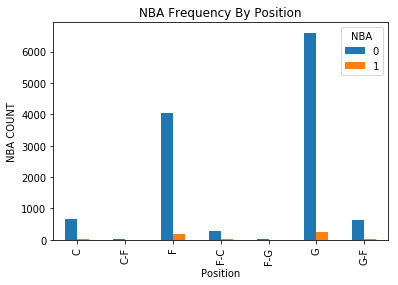

In [40]:
#plot nba level by position
%matplotlib inline
pd.crosstab(players.position,players.NBA).plot(kind='bar')
plt.title('NBA Frequency By Position')
plt.xlabel('Position')
plt.ylabel('NBA COUNT')